In [1]:
# import necessary libraries
# virtual environment is tied to python 3.10.2
import math
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import matplotlib.patches as pch
%matplotlib inline
from matplotlib.ticker import MaxNLocator # to make integer ticks on x axis

In [2]:
# define variables
t               = sm.symbols("t", real=True)        # variable of integration
n               = sm.symbols("n", integer=True)     # n-th harmonic
T               = sm.symbols("T", positive=True)    # period
A               = sm.symbols("A", real=True)        # amplitude

In [3]:
# define target function
# f(t) = A*(1-(t/tau)) if 0 <= t < tau and 0 if tau <= t < (2*tau)
# T = 2*tau since duty cycle is set to 50%
tau     = T/2
T_val   = 0.1e-6  # Period in seconds (0.1 microseconds)

ft = sm.Piecewise(
    ((A*(1-(t/tau))), (t >= 0) & (t < tau)),
    (0, (t >= tau) & (t < T))
)

In [4]:
# define target function as a fourier series approximation
def fourier_coefficients(f, t, n, T):


    omega_n = 2 * sm.pi * n / T
    integral = sm.integrate(f * sm.exp(-sm.I * omega_n * t), (t, 0, T))
    cn = (1/T) * integral
    return cn

In [5]:
# Calculate fourier coefficients
fs_coefficients_sawtooth = fourier_coefficients(ft,t,n,T)
# Substitute A and T
fs_coefficients_sawtooth = fs_coefficients_sawtooth.subs({A: 1, T: T_val})
# Show simplified result
fs_coefficients_sawtooth, fs_coefficients_sawtooth.simplify()

⎛           ⎛⎧                                  -ⅈ⋅π⋅n           ⎞  ⎧    ⎛     ↪
⎜           ⎜⎪  1.0e-7⋅ⅈ⋅π⋅n - 1.0e-7   5.0e-8⋅ℯ                 ⎟  ⎪0.5⋅⎝- (- ↪
⎜           ⎜⎪- ───────────────────── - ──────────────  for n ≠ 0⎟  ⎪───────── ↪
⎜10000000.0⋅⎜⎨            2  2               2  2                ⎟, ⎨          ↪
⎜           ⎜⎪         2⋅π ⋅n               π ⋅n                 ⎟  ⎪          ↪
⎜           ⎜⎪                                                   ⎟  ⎪          ↪
⎝           ⎝⎩                 2.5e-8                   otherwise⎠  ⎩          ↪

↪   n            ⎞                   ⎞
↪ 1)  - ⅈ⋅π⋅n + 1⎠                   ⎟
↪ ────────────────  for n > 0 ∨ n < 0⎟
↪   2  2                             ⎟
↪  π ⋅n                              ⎟
↪                                    ⎟
↪  0.25                 otherwise    ⎠

In [6]:
# Here are some of the terms of the Fourier Series
vals = range(-10,10)
terms = [fs_coefficients_sawtooth.subs(n, k) * sm.exp(2*sm.pi*sm.I*k *t / 0.1) for k in vals]
terms

⎡⎛  0.005   50000.0⋅(-1.0e-7 - 1.0e-6⋅ⅈ⋅π)⎞  -200.0⋅ⅈ⋅π⋅t  ⎛0.0061728395061728 ↪
⎢⎜- ───── - ──────────────────────────────⎟⋅ℯ            , ⎜────────────────── ↪
⎢⎜    2                    2              ⎟                ⎜         2         ↪
⎣⎝   π                    π               ⎠                ⎝        π          ↪

↪ 4   61728.3950617284⋅(-1.0e-7 - 9.0e-7⋅ⅈ⋅π)⎞  -180.0⋅ⅈ⋅π⋅t  ⎛  0.0078125   7 ↪
↪ ─ - ───────────────────────────────────────⎟⋅ℯ            , ⎜- ───────── - ─ ↪
↪                        2                   ⎟                ⎜      2         ↪
↪                       π                    ⎠                ⎝     π          ↪

↪ 8125.0⋅(-1.0e-7 - 8.0e-7⋅ⅈ⋅π)⎞  -160.0⋅ⅈ⋅π⋅t  ⎛0.0102040816326531   102040.8 ↪
↪ ─────────────────────────────⎟⋅ℯ            , ⎜────────────────── - ──────── ↪
↪               2              ⎟                ⎜         2                    ↪
↪              π               ⎠                ⎝        π                     ↪

↪ 16326531⋅(-1.0e-7 - 7.0

In [7]:
# Here are the terms write with sines and cosines
[t.rewrite(sm.sin) for t in terms]

⎡⎛  0.005   50000.0⋅(-1.0e-7 - 1.0e-6⋅ⅈ⋅π)⎞                                    ↪
⎢⎜- ───── - ──────────────────────────────⎟⋅(-ⅈ⋅sin(200⋅π⋅t) + cos(200⋅π⋅t)),  ↪
⎢⎜    2                    2              ⎟                                    ↪
⎣⎝   π                    π               ⎠                                    ↪

↪ ⎛0.00617283950617284   61728.3950617284⋅(-1.0e-7 - 9.0e-7⋅ⅈ⋅π)⎞              ↪
↪ ⎜─────────────────── - ───────────────────────────────────────⎟⋅(-ⅈ⋅sin(180⋅ ↪
↪ ⎜         2                               2                   ⎟              ↪
↪ ⎝        π                               π                    ⎠              ↪

↪                       ⎛  0.0078125   78125.0⋅(-1.0e-7 - 8.0e-7⋅ⅈ⋅π)⎞         ↪
↪ π⋅t) + cos(180⋅π⋅t)), ⎜- ───────── - ──────────────────────────────⎟⋅(-ⅈ⋅sin ↪
↪                       ⎜      2                      2              ⎟         ↪
↪                       ⎝     π                      π               ⎠         ↪

↪                        

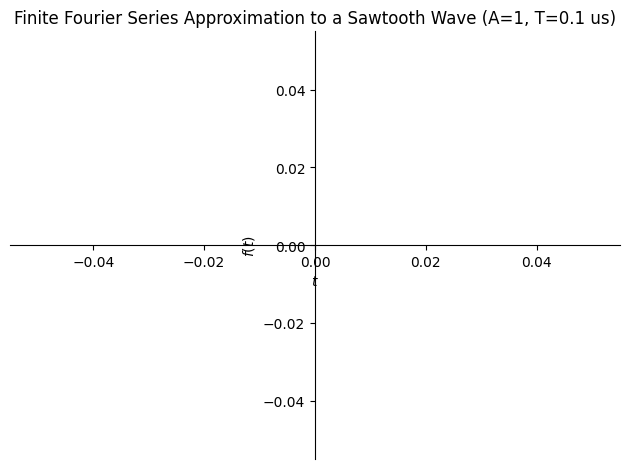

In [8]:
# Plot the sum of all the terms versus t
fapprox = sum(terms)
plot = sm.plot(fapprox, (t, -2 * T_val, 2 * T_val), title="Finite Fourier Series Approximation to a Sawtooth Wave (A=1, T=0.1 us)", show=False)
plot.show() # Explicitly show the plot